# Ideal Non-interacting Gas in a Partitioned Box

In this simulation, we consider a box divided in half with by a membrane with a small hole in the center. The density of the gas is small enough so that the gas molecules do not interact. The total number of particles in the box is $N$, and the number on one side starts at $n$ (leaving $N-n$ on the other side).

This simulation implements the ApproachToEquilibriumParticlesInBox() algorithm described on pages 9-10 of Statistical and Thermal Physics by Gould and Tobochnik <<https://www.compadre.org/STP/>>. The authors are motiviting the subject from a microscopic perspective and discussing the apparent existence of a macroscopic arrow of time that is not present microscopically (see Problem 1.2 and the surounding discussion):

"To gain some more insight into why there is a direction of time, we consider a simpler model which shows similar behavior. Imagine a closed box that is divided into two parts of equal areas. The left half initially contains $N$ identical particles and the right half is empty. We then make a small hole in the partition between the two halves. What happens? Instead of simulating this system by solving Newton’s equations for each particle, we adopt a simpler approach based on a probabilistic model. We assume that the system is so dilute that the particles do not interact with one another. Hence, the probability per unit time that a particle goes through the hole in the partition is the same for all particles regardless of the number of particles in either half. We also assume that the size of the hole is such that only one particle can pass through in one unit of time."

"One way to implement this model is to choose a particle at random and move it to the other half. This procedure is cumbersome, because our only interest is the number of particles on each side. That is, we need to know only $n$, the number of particles on the left side; the number on the right side is $N−n$. Because each particle has the same chance to go through the hole in the partition, the probability per unit time that a particle moves from left to right equals the number of particles on the left side divided by the total number of particles; that is, the probability of a move from left to right is $n/N$."

### Exercise CM#.1 (guided):
The algorithm for simulating the evolution of the model is given by the following steps:
1. Generate a random number r from a uniformly distributed set of random numbers in the unit interval 0 ≤ r < 1.
2. If r ≤ n/N, a particle is moved from left to right, that is, let n → n−1; otherwise, n → n+1.
3. Increase the “time” by 1.

In [8]:
# Some python initialization before starting
#from __future__ import division  #if you are using Python 2
import numpy as np
import matplotlib
from matplotlib.pyplot import *

The code will be "simple minded" on the one hand; but on the other hand it will illustrate the primitive idea of a "functional programming style" that proceeds by creating progressibly complex functions (see Think Python/Julia for more ellaborate examples). 

First we define two functions:

* propagate(n,N): generates a random number between 0 and 1 and compares it to the ratio on n/N (number on left/total number) and either boosts the number on the left by one or decreases it by one. 

* createRun(n, N, timeSteps): generates a complete run with length = timeSteps. At it's conclusion, it returns two arrays: left() = number of particles on the left side of box at each time step, and right() = number of particles on the right side of box at each time step.

In [5]:
def propagate(n,N):
    r = np.random.random()
    if r < n/N and n > 0:
        n = n - 1
    elif r >= n/N and n < N:
        n = n + 1
    else:
        print("problem: should not have arrived here!")
        pass
    return n

def createRun(n,N,timeSteps):
    t = np.arange(0,timeSteps)
    left = []
    right = []
    for i in range(len(t)):
        left.append(n)
        right.append(N-n)
        n = propagate(n, N)
    
    return np.array(left),np.array(right)

Now we define a function runAndPlot() which creates a simulation with the option to run a number of different trials (numTrials); the routine then averages the results at each time step so that one can get an "ensemble" average. 

In [6]:
def runAndPlot(nLeft,N,timeSteps,numTrials):

    for i in range(numTrials):
        left,right = createRun(nLeft,N,timeSteps)
        if i == 0:
            numLeft = left
            numRight = right
        else:
            numLeft = np.vstack((numLeft,left))
            numRight = np.vstack((numRight,right))
    
    ylim(0,N)
    plot(np.average(numLeft,axis=0))

Here are three differnet runs, with increasing number of trials, all displayed together:

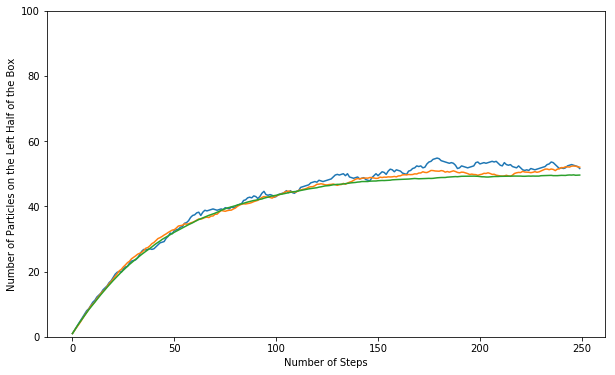

In [7]:
figure(figsize=(10,6))
xlabel("Number of Steps")
ylabel("Number of Particles on the Left Half of the Box")
runAndPlot(1,100,250,5)
runAndPlot(1,100,250,25)
runAndPlot(1,100,250,625) #the last one gets to decide ylim

### Exercise CM#.2 (challenge):
Generalize the code above so that the box is partioned in three (left, middle and right) thirds. How should the probabilities be assigned now? If it makes things simpler, you can consider periodic boundary conditions. Run the simulation and observe if the equilibration happens more or less efficiently. Compare with the discussion of Problem 1.1 in Gould&Tobochnik's book and optionally also with their Java simulations (which implement a different, more complicated, type of algorithm that we will get to in a future module).

In [1]:
# Solution

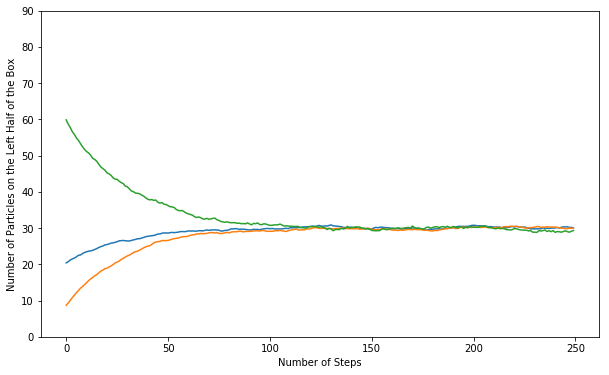

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 17:34:31 2020

@author: christos
"""

import numpy as np
import matplotlib
from matplotlib.pyplot import *

def propagate(nleft,nmid,N):
    r = np.random.random()
    nright = (N) - (nleft + nmid)
    Ntot = (nright + nleft + nmid)
    
    if r < 1.5*nleft/N and nleft > 0:
        nleft = nleft - 1
    elif r >= 1.5*nleft/N and nleft < N:
        nleft = nleft + 1
    else:
        pass
    
    p = np.random.random()
    if p < 1.5*nmid/N and nmid > 0:
        nmid = nmid - 1
    elif p >= 1.5*nmid/N and nmid < N:
        nmid = nmid + 1
    else:
        pass
    
    q = np.random.random()
    if q < 1.5*nright/N and nright > 0:
        nright = nright - 1
    elif q >= 1.5*nright/N and nright < N:
        nright = nright + 1
    else:
        pass
    
    return nleft,nmid,nright

def createRun(nleft,nmid,N,timeSteps):
    t = np.arange(0,timeSteps)
    nright = N - (nleft + nmid)
    left = []
    mid = []
    right = []
    
    for i in range(len(t)):
        nleft = propagate(nleft,nmid, N)[0]
        nmid = propagate(nleft,nmid, N)[1]
        nright = propagate(nleft,nmid, N)[2]
        left.append(nleft)
        mid.append(nmid)
        right.append(nright)
    
    return np.array(left),np.array(mid),np.array(right)

def runAndPlot(nleft,nmid,N,timeSteps,numTrials):

    for i in range(numTrials):
        left = createRun(nleft,nmid,N,timeSteps)[0]
        mid = createRun(nleft,nmid,N,timeSteps)[1]
        right = createRun(nleft,nmid,N,timeSteps)[2]
        if i == 0:
            numLeft = left
            numMid = mid
            numRight = right
        else:
            numLeft = np.vstack((numLeft,left))
            numMid = np.vstack((numMid,mid))
            numRight = np.vstack((numRight,right))
    
    ylim(0,N)
    plot(np.average(numLeft,axis=0))
    plot(np.average(numMid,axis=0))
    plot(np.average(numRight,axis=0))
    

figure(figsize=(10,6))
xlabel("Number of Steps")
ylabel("Number of Particles on the Left Half of the Box")

runAndPlot(20,8,90,250,100)

# The three curves are the number of particles in each region unlike what is plotted in the guided exercise